# Script to Learn the Modell

Uses the generated features from extraction.csv to train different models and evaluate them.

In [1]:
#Import Used Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [2]:
# Set the Path for the Data and print the folder names (genre):
import os
general_path = './Data'
print(list(os.listdir(f'{general_path}/fmasmallsortedwavs/')))

['Hip-Hop', 'Experimental', 'Pop', 'Instrumental', 'Electronic', 'Rock', 'Folk', 'International']


### Reading in the Data (extraction.csv)

In [3]:
data = pd.read_csv(f'{general_path}/extractionfmasmall.csv')    # Read the .csv with Pandas and save it in a dataframe
data = data.iloc[0:, 4:]  # Drop the columns with are not containing features like directory and name of the song
data.head() # Show the features to check the correct extraction

,genre,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,Hip-Hop,66150,0.413196,0.086351,0.222963,0.004828,1800.421389,307948.794503,2373.186904,143730.744400,...,7.370428,70.236824,-9.250566,48.648830,1.733517,41.165012,-4.221838,49.998210,5.928525,35.612180
1,Hip-Hop,66150,0.423230,0.086523,0.206769,0.002342,1984.966568,351784.241406,2479.441791,128964.643340,...,5.481791,35.427032,-9.333029,36.353447,5.723474,58.501488,-5.234368,54.809864,5.404532,43.505400
2,Hip-Hop,66150,0.417725,0.085322,0.221868,0.002805,1864.297387,197766.000094,2334.206169,133893.988944,...,6.005658,53.119453,-8.624401,56.696877,7.972457,40.752193,-2.396070,63.131912,6.261770,62.878765
3,Hip-Hop,66150,0.446542,0.080059,0.211096,0.002553,1883.113574,254662.012464,2366.714988,183574.435986,...,4.138032,46.237460,-10.378683,25.344183,2.785018,25.795591,-3.183853,44.068825,6.348105,26.784405
4,Hip-Hop,66150,0.467263,0.078167,0.214846,0.002596,2042.302786,273175.135922,2442.295889,130262.041724,...,5.525832,38.076794,-9.556235,38.558468,6.890258,35.910150,-4.308472,47.317993,3.690189,36.751537


### Split Data in Features and Label

In [4]:
y = data['genre'] # Get genre variable for the Label.
X = data.loc[:, data.columns != 'genre'] #select all columns but not the labels

#### NORMALIZE X: Attention at Usage!! Not needed for XGBoost ####

# Normalize so everything is on the same scale. 

#cols = X.columns
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(X)

#new data frame with the new scaled data. 
#X = pd.DataFrame(np_scaled, columns = cols)

### Splitting the data into training and testing

* 70% - 30% split

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # The label encoder maps the genres to numbers so that they can be processed by the learning algorithm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### Model Evaluation with 10 Models

In [6]:
# Create a function to train the modell and evaluate the performance

# TO DO: Add additional performance measurements variables like F1-Score!
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train) # Train the modell
    preds = model.predict(X_test)   # Make a prediction on all the test data
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(metrics.accuracy_score(y_test, preds), 5), '\n')    # Compare the results of the prediction with the correct labels
    print('Classification-Report for ', title, ':\n',metrics.classification_report(y_test, preds, digits=4),'\n')

Creation of the models and evaluation with the "model_acess"-function:

In [7]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")


# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.30201 

Classification-Report for  Naive Bayes :
               precision    recall  f1-score   support

           0     0.2947    0.0631    0.1040      2820
           1     0.2902    0.0266    0.0488      2780
           2     0.3277    0.2779    0.3008      2814
           3     0.3867    0.5812    0.4644      2796
           4     0.4312    0.4478    0.4393      2890
           5     0.4014    0.1191    0.1838      2820
           6     0.1687    0.0682    0.0971      2830
           7     0.2303    0.8242    0.3600      2839

    accuracy                         0.3020     22589
   macro avg     0.3164    0.3010    0.2498     22589
weighted avg     0.3166    0.3020    0.2505     22589
 

Accuracy Stochastic Gradient Descent : 0.16822 

Classification-Report for  Stochastic Gradient Descent :
               precision    recall  f1-score   support

           0     0.1667    0.0007    0.0014      2820
           1     0.2955    0.0047    0.0092      2780
  

### Training with XGBoost + Confusion Matrix

Accuracy : 0.68117 

              precision    recall  f1-score   support

           0     0.7050    0.6713    0.6877      2820
           1     0.7178    0.6129    0.6612      2780
           2     0.6540    0.7456    0.6968      2814
           3     0.7334    0.8036    0.7669      2796
           4     0.6847    0.6972    0.6909      2890
           5     0.6798    0.6993    0.6894      2820
           6     0.5526    0.4940    0.5216      2830
           7     0.7143    0.7256    0.7199      2839

    accuracy                         0.6812     22589
   macro avg     0.6802    0.6812    0.6793     22589
weighted avg     0.6801    0.6812    0.6792     22589

F1-Score : 0.68117 



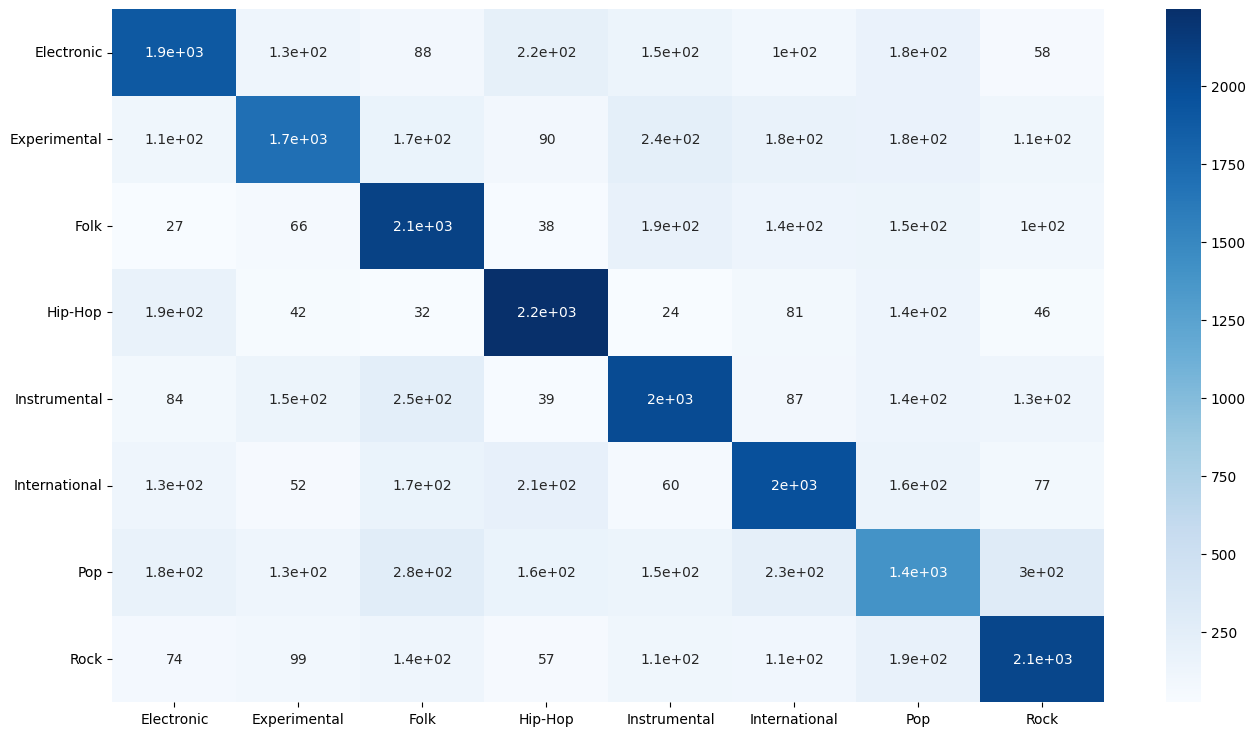

In [11]:
# Final model based on the best results from above:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
###xgb.fit(X_train, y_train)
##xgb.save_model("xgb_model_fmasmall.txt")     # Save learned model into a .txt-File
xgb.load_model("xgb_model_fmasmall.txt")
preds = xgb.predict(X_test)

print('Accuracy', ':', round(metrics.accuracy_score(y_test, preds), 5), '\n')
print(metrics.classification_report(y_test, preds, digits=4))
print('F1-Score', ':', round(metrics.f1_score(y_test, preds, average='micro'), 5), '\n')
# Confusion Matrix
confusion_matr = metrics.confusion_matrix(y_test, preds)  # Check where there is a mismatch of the genres
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["Electronic", "Experimental", "Folk", "Hip-Hop", "Instrumental", "International", "Pop", "Rock"],
           yticklabels=["Electronic", "Experimental", "Folk", "Hip-Hop", "Instrumental", "International", "Pop", "Rock"]);
plt.savefig("conf matrix")

### Feature Importance

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1) # Check which features are important/how there weight is
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0394 ± 0.0026,chroma_stft_mean
0.0342 ± 0.0037,perceptr_var
0.0309 ± 0.0014,harmony_mean
0.0297 ± 0.0024,mfcc1_mean
0.0288 ± 0.0033,perceptr_mean
0.0286 ± 0.0027,harmony_var
0.0276 ± 0.0018,mfcc4_mean
0.0273 ± 0.0031,spectral_bandwidth_mean
0.0244 ± 0.0040,mfcc3_mean
0.0225 ± 0.0019,rms_mean
